## Plot de una curva, generacon de ruido alrededor de ella y ajustar una curva sobr el ruido

In [54]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import numpy as np
from math import sin

In [55]:
def func(x, a, b, c):
    return a * np.exp(x*np.pi / 180.)

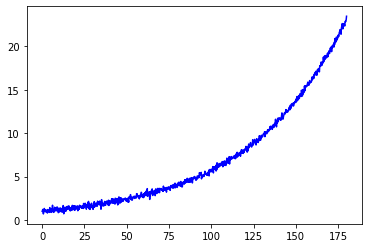

In [56]:
xdata = np.linspace(0, 180, 1000) #array de 50 datos. inicia en 0 y termina en 4, con 50 intervalos 
y = func(xdata, 1, 1.3, 56)       #Generacion de datos y= func(xdata)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size) #generacion de ruido alrededor de y
ydata = y + y_noise  #curva de y+ruido  ydata=yRuido
plt.plot(xdata, ydata, 'b-', label='data') #plot de x vs yRuido


/home/oem/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


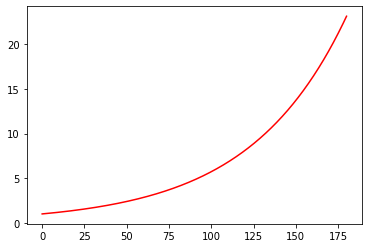

In [57]:
popt, _ = curve_fit(func, xdata, ydata) #ajustar valores de x y yRuido a la funcion "func"
#popt
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) #plot de xdata vs f(xdata)

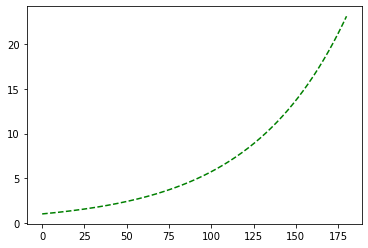

In [58]:
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [59]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

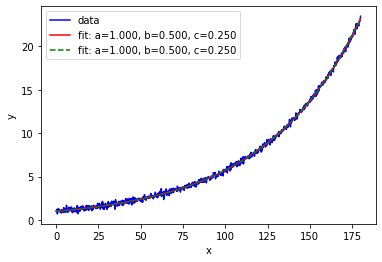

In [60]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-' ,label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Codigo para generar valores en X, hacer un histograma y despues una curva con los datos del histograma

In [61]:
Data = np.random.RandomState(10000) #ADUs
yData = Data.randn(10000) #lista con valores distribuidos de manera normal

In [62]:
yData #valores de los pixeles contenidos en un arreglo de 10 x 10

array([-1.27109064,  0.17613707, -0.29621638, ...,  0.66019026,
        0.53913786,  0.91287497])

In [63]:
yData.size

10000

In [64]:
xData=np.arange(0,10000)

In [65]:
xData #pixeles de un arreglo 100 x 100

array([   0,    1,    2, ..., 9997, 9998, 9999])

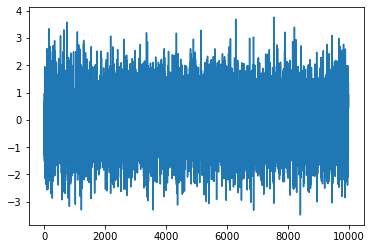

In [66]:
plt.plot(xData, yData)

In [67]:
### Creacion del histograma

In [68]:
bins=np.histogram_bin_edges(yData, bins='fd')

In [69]:
bins

array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
       -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
       -2.25565806, -2.13290252, -2.01014697, -1.88739143, -1.76463589,
       -1.64188034, -1.5191248 , -1.39636926, -1.27361371, -1.15085817,
       -1.02810263, -0.90534708, -0.78259154, -0.65983599, -0.53708045,
       -0.41432491, -0.29156936, -0.16881382, -0.04605828,  0.07669727,
        0.19945281,  0.32220835,  0.4449639 ,  0.56771944,  0.69047499,
        0.81323053,  0.93598607,  1.05874162,  1.18149716,  1.3042527 ,
        1.42700825,  1.54976379,  1.67251933,  1.79527488,  1.91803042,
        2.04078597,  2.16354151,  2.28629705,  2.4090526 ,  2.53180814,
        2.65456368,  2.77731923,  2.90007477,  3.02283031,  3.14558586,
        3.2683414 ,  3.39109695,  3.51385249,  3.63660803,  3.75936358])

In [70]:
data_histo, bins = np.histogram(yData,bins=bins)        #np.histogram genera los datos en data_histo y los bins

In [71]:
data_histo # data_histo[0]: frecuencia u ocurrencia; data_histo[1]: bins

array([  1,   3,   2,   6,   7,   9,  13,  21,  28,  38,  58,  65,  65,
        86, 108, 115, 185, 207, 220, 264, 299, 378, 369, 439, 430, 456,
       494, 471, 482, 479, 476, 463, 437, 402, 359, 388, 296, 245, 204,
       182, 169, 127, 109,  86,  75,  50,  38,  21,  22,  13,  14,   3,
         8,   4,   4,   3,   1,   1,   2])

In [72]:
bins

array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
       -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
       -2.25565806, -2.13290252, -2.01014697, -1.88739143, -1.76463589,
       -1.64188034, -1.5191248 , -1.39636926, -1.27361371, -1.15085817,
       -1.02810263, -0.90534708, -0.78259154, -0.65983599, -0.53708045,
       -0.41432491, -0.29156936, -0.16881382, -0.04605828,  0.07669727,
        0.19945281,  0.32220835,  0.4449639 ,  0.56771944,  0.69047499,
        0.81323053,  0.93598607,  1.05874162,  1.18149716,  1.3042527 ,
        1.42700825,  1.54976379,  1.67251933,  1.79527488,  1.91803042,
        2.04078597,  2.16354151,  2.28629705,  2.4090526 ,  2.53180814,
        2.65456368,  2.77731923,  2.90007477,  3.02283031,  3.14558586,
        3.2683414 ,  3.39109695,  3.51385249,  3.63660803,  3.75936358])

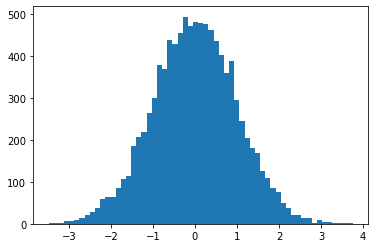

In [73]:
histograma=plt.hist(yData, bins=bins)# #plt.hist genera los datos del histograma, guarda los "datos,bins" y hace un plot

In [74]:
histograma[0] #datos del histograma

array([  1.,   3.,   2.,   6.,   7.,   9.,  13.,  21.,  28.,  38.,  58.,
        65.,  65.,  86., 108., 115., 185., 207., 220., 264., 299., 378.,
       369., 439., 430., 456., 494., 471., 482., 479., 476., 463., 437.,
       402., 359., 388., 296., 245., 204., 182., 169., 127., 109.,  86.,
        75.,  50.,  38.,  21.,  22.,  13.,  14.,   3.,   8.,   4.,   4.,
         3.,   1.,   1.,   2.])

In [75]:
histograma[1] #bins del histograma

array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
       -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
       -2.25565806, -2.13290252, -2.01014697, -1.88739143, -1.76463589,
       -1.64188034, -1.5191248 , -1.39636926, -1.27361371, -1.15085817,
       -1.02810263, -0.90534708, -0.78259154, -0.65983599, -0.53708045,
       -0.41432491, -0.29156936, -0.16881382, -0.04605828,  0.07669727,
        0.19945281,  0.32220835,  0.4449639 ,  0.56771944,  0.69047499,
        0.81323053,  0.93598607,  1.05874162,  1.18149716,  1.3042527 ,
        1.42700825,  1.54976379,  1.67251933,  1.79527488,  1.91803042,
        2.04078597,  2.16354151,  2.28629705,  2.4090526 ,  2.53180814,
        2.65456368,  2.77731923,  2.90007477,  3.02283031,  3.14558586,
        3.2683414 ,  3.39109695,  3.51385249,  3.63660803,  3.75936358])

#### Ajustar una curva 

In [76]:
print('Para ajustar una curva es necesario que ambos ejes sean del mismo tamaño\nsize datos= '+str(histograma[0].size)+'\n'+'size bins= '+str(histograma[1].size))

Para ajustar una curva es necesario que ambos ejes sean del mismo tamaño
size datos= 59
size bins= 60


In [77]:
print('max=  '+str(histograma[1].max()))
print('min= '+str(histograma[1].min()))
print('size= '+str(histograma[1].size))

max=  3.7593635764838433
min= -3.4832134981417675
size= 60


In [78]:
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size)

In [79]:
x.size


60

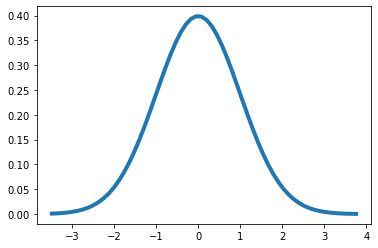

In [80]:
plt.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)

### Combinar plots

In [95]:
yData

array([-1.27109064,  0.17613707, -0.29621638, ...,  0.66019026,
        0.53913786,  0.91287497])

In [96]:
mu, std = norm.fit(yData)

(array([0.00081463, 0.00244388, 0.00162925, 0.00488776, 0.00570239,
        0.00733164, 0.01059015, 0.01710717, 0.02280956, 0.03095583,
        0.04724838, 0.05295077, 0.05295077, 0.07005794, 0.08797973,
        0.09368212, 0.15070602, 0.16862782, 0.17921798, 0.21506157,
        0.24357352, 0.30792907, 0.30059742, 0.35762132, 0.35028968,
        0.37146999, 0.40242582, 0.38368939, 0.39265029, 0.39020641,
        0.38776253, 0.37717238, 0.35599207, 0.32748012, 0.29245115,
        0.31607534, 0.24112964, 0.19958365, 0.16618394, 0.14826214,
        0.13767199, 0.10345765, 0.08879436, 0.07005794, 0.06109704,
        0.04073136, 0.03095583, 0.01710717, 0.0179218 , 0.01059015,
        0.01140478, 0.00244388, 0.00651702, 0.00325851, 0.00325851,
        0.00244388, 0.00081463, 0.00081463, 0.00162925]),
 array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
        -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
        -2.25565806, -2.13290252, -2.01014697, -

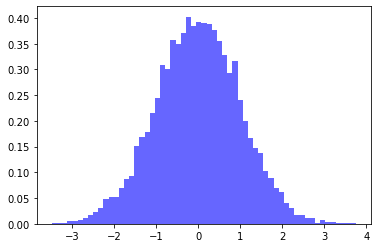

In [97]:
plt.hist(yData, bins, density=True, alpha=0.6, color='b')

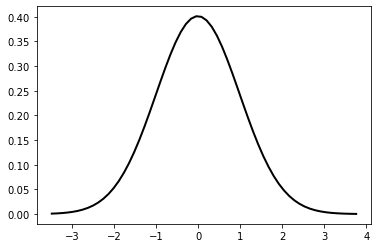

In [98]:
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

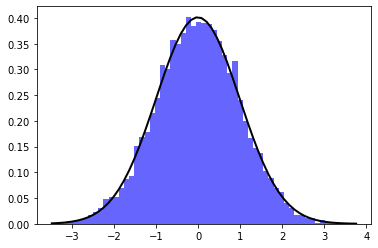

In [100]:
plt.hist(yData, bins, density=True, alpha=0.6, color='b')
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)